## RMF Analysis

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [215]:
df=pd.read_csv('OnlineRetail.csv', encoding = 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [216]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [217]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [218]:
currentDate = pd.to_datetime("2012-01-01")
df['InvoiceDate']=pd.to_datetime(df["InvoiceDate"])

In [219]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [220]:
currentDate

Timestamp('2012-01-01 00:00:00')

In [221]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [222]:
maxdate = df.groupby(["CustomerID"]).max()[['InvoiceDate']]
maxdate

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:17:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [223]:
maxdate['InvoiceAge'] = (currentDate - maxdate['InvoiceDate']).dt.days
maxdate

,InvoiceDate,InvoiceAge
CustomerID,,
12346.0,2011-01-18 10:17:00,347
12347.0,2011-12-07 15:52:00,24
12348.0,2011-09-25 13:13:00,97
12349.0,2011-11-21 09:51:00,40
12350.0,2011-02-02 16:01:00,332
...,...,...
18280.0,2011-03-07 09:52:00,299
18281.0,2011-06-12 10:53:00,202
18282.0,2011-12-02 11:43:00,29


In [224]:
#recenccy
recency = maxdate.drop('InvoiceDate', axis=1)
recency

,InvoiceAge
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
...,...
18280.0,299
18281.0,202
18282.0,29


In [225]:
#frequency
freq = df.drop_duplicates(subset="InvoiceNo")
freq

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom


In [226]:
#frequency
freq = freq.groupby(["CustomerID"]).count()[["InvoiceNo"]]
freq

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,3


In [227]:
#monetary
df["total"]=df["Quantity"]*df["UnitPrice"]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [228]:
#monetary
money=df.groupby(["CustomerID"])[["total"]].sum()
money

,total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [229]:
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,-77183.6


In [230]:
RFM=pd.concat([recency,freq,money], axis=1)
RFM

,InvoiceAge,InvoiceNo,total
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


In [231]:
RFM.columns = ['Recency', 'Frequency', 'Monetary']
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,2,0.00
12347.0,24,7,4310.00
12348.0,97,4,1797.24
12349.0,40,1,1757.55
12350.0,332,1,334.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,3,176.60


In [232]:
# Standardization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

In [233]:
scaled

array([[ 2.31656788, -0.32936215, -0.23100099],
       [-0.88904975,  0.20610242,  0.29343167],
       [-0.16456032, -0.11517632, -0.01231622],
       ...,
       [-0.83942719, -0.22226923, -0.20951263],
       [-0.87912524,  1.16993863,  0.02390005],
       [-0.49206924, -0.22226923, -0.00744423]])

In [234]:
scaled.shape

(4372, 3)

In [235]:
from sklearn.cluster import KMeans

### To find out the value of K

In [236]:
k_range = range(2,11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k) 
    km.fit(scaled)
    sse.append(km.inertia_) #Sum of squared distances of samples to their closest cluster center.

In [237]:
sse

[9134.642381209182,
 5579.619016131372,
 4081.896097033866,
 3602.193179284245,
 2554.563065437761,
 2023.2753536481052,
 1585.703856664251,
 1433.3558641766328,
 1372.3467105313018]

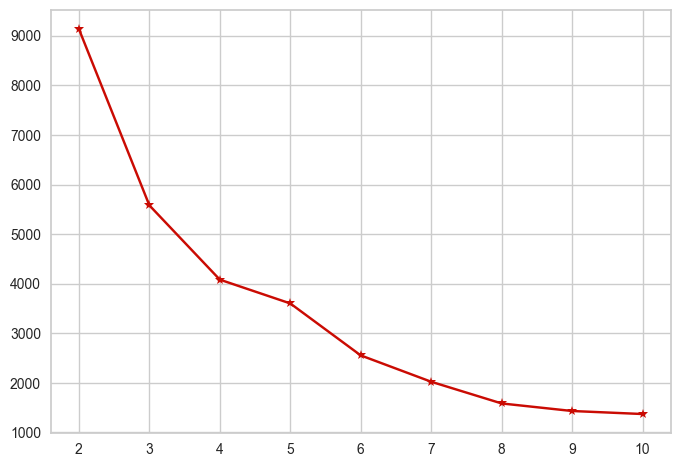

In [238]:
plt.plot(k_range, sse, 'r-*')
plt.xlabel ='k'
plt.ylabel = 'Sum of Squared Error'

In [239]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


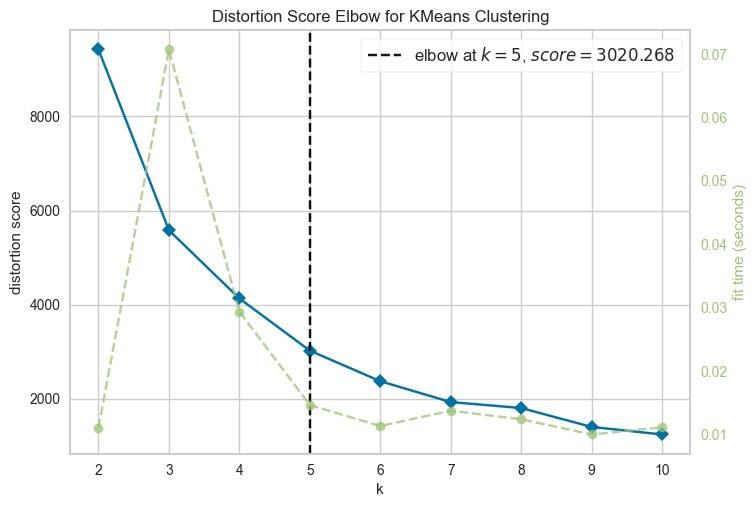

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [240]:
from yellowbrick.cluster import KElbowVisualizer
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(scaled)
Elbow.show()

### Object Creation and data fitting

In [241]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled)

KMeans(n_clusters=3)

In [242]:
kmeans.labels_

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [243]:
kmeans.labels_.shape

(4372,)

In [244]:
RFM["Clusters"]=(kmeans.labels_)
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,2,0.00,0
12347.0,24,7,4310.00,1
12348.0,97,4,1797.24,1
12349.0,40,1,1757.55,1
12350.0,332,1,334.40,0
...,...,...,...,...
18280.0,299,1,180.60,0
18281.0,202,1,80.82,0
18282.0,29,3,176.60,1


In [245]:
RFM.Clusters.unique()

array([0, 1, 2], dtype=int32)

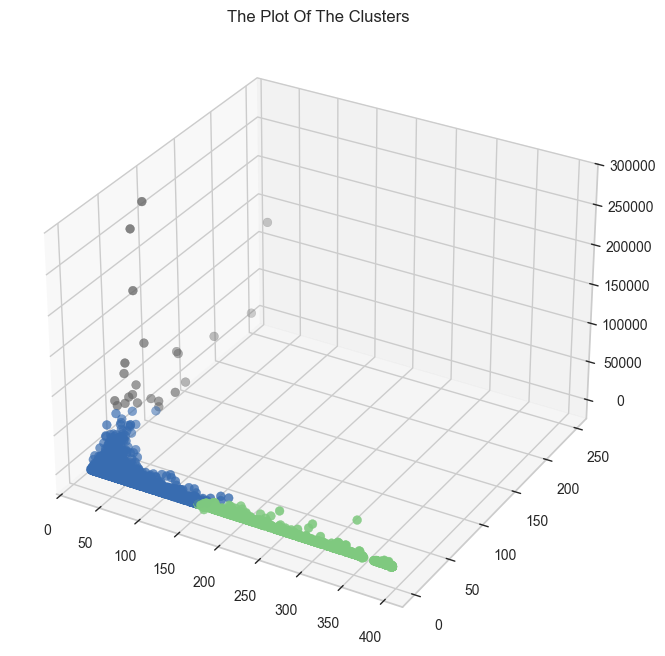

In [246]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(RFM["Recency"],RFM["Frequency"],RFM["Monetary"], s=40, c=RFM["Clusters"], marker='o', cmap = "Accent")
ax.set_title("The Plot Of The Clusters")
plt.show()

In [262]:
RFM[RFM.Clusters==0]

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
12346.0,347,2,0.00,0,Silver
12350.0,332,1,334.40,0,Silver
12353.0,226,1,89.00,0,Silver
12354.0,254,1,1079.40,0,Silver
12355.0,236,1,459.40,0,Silver
...,...,...,...,...,...
18260.0,194,8,2595.00,0,Silver
18262.0,162,1,149.48,0,Silver
18269.0,380,2,138.90,0,Silver


In [248]:
RFM[RFM.Clusters==1]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12347.0,24,7,4310.00,1
12348.0,97,4,1797.24,1
12349.0,40,1,1757.55,1
12352.0,58,11,1545.41,1
12356.0,44,3,2811.43,1
...,...,...,...,...
18277.0,80,2,97.63,1
18278.0,95,1,173.90,1
18282.0,29,3,176.60,1


In [249]:
RFM[RFM.Clusters==2]

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12415.0,46,26,123725.45,2
12748.0,22,224,29072.10,2
12971.0,25,89,10930.26,2
13089.0,24,118,57385.88,2
13408.0,23,81,27487.41,2
13694.0,25,60,62653.10,2
13798.0,23,63,36351.42,2
14096.0,26,34,57120.91,2
14156.0,31,66,113384.14,2


In [250]:
final=RFM.groupby("Clusters").mean()[["Recency","Frequency","Monetary"]]
final

,Recency,Frequency,Monetary
Clusters,,,
0,267.527502,1.853922,460.132111
1,61.498765,5.597531,1823.319316
2,27.521739,86.869565,81835.857391


In [251]:
def func(row):
    if row["Clusters"]==0:
        return 'Silver'
    elif row["Clusters"]==2:
        return 'Diamond'
    else:
        return 'Gold'

In [252]:
RFM['group']=RFM.apply(func, axis=1)

In [253]:
RFM

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
12346.0,347,2,0.00,0,Silver
12347.0,24,7,4310.00,1,Gold
12348.0,97,4,1797.24,1,Gold
12349.0,40,1,1757.55,1,Gold
12350.0,332,1,334.40,0,Silver
...,...,...,...,...,...
18280.0,299,1,180.60,0,Silver
18281.0,202,1,80.82,0,Silver
18282.0,29,3,176.60,1,Gold


In [254]:
result = pd.DataFrame(RFM.group.value_counts())
result

,count
group,
Gold,3240
Silver,1109
Diamond,23


In [255]:
result = result.reset_index()
result

,group,count
0,Gold,3240
1,Silver,1109
2,Diamond,23


In [256]:
import seaborn as sns

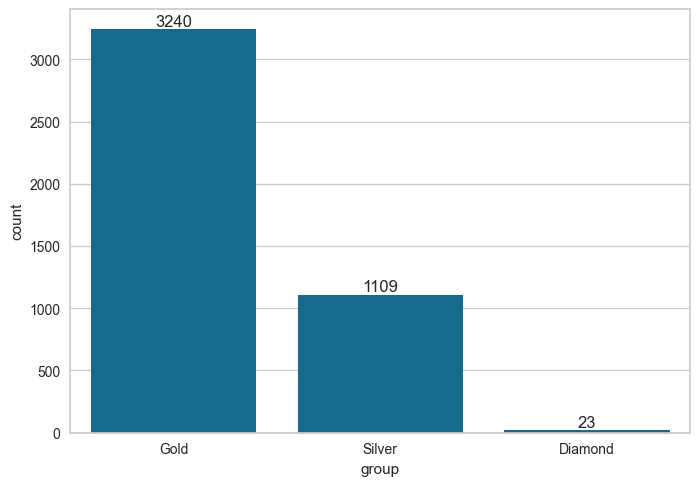

In [257]:
datalabel=sns.barplot(x="group", y="count", data=result, estimator=np.sum)
for i in datalabel.containers:
    datalabel.bar_label(i,)

In [258]:
ABC = RFM[RFM.Clusters==2]

In [259]:
ABC[ABC['Monetary']==ABC['Monetary'].min()]

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
12971.0,25,89,10930.26,2,Diamond


In [260]:
ABC[ABC['Monetary']==ABC['Monetary'].max()]

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
14646.0,23,77,279489.02,2,Diamond


In [261]:
ABC = RFM[RFM.Clusters==0]
ABC[ABC['Monetary']==ABC['Monetary'].max()]

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
15749.0,257,4,21535.9,0,Silver
